In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
from matplotlib.colors import ListedColormap
from sklearn.model_selection import cross_val_score

from matplotlib import animation
from sklearn.svm import SVC, SVR
import pickle
import sklearn.datasets as datasets
np.random.seed(2343)


In [2]:
colormap = {0:'black', 1:'red', 2:'blue'}
bkgrnd_colors = ListedColormap(['#8c8c8c', '#e68e8e', '#e68482'])

colormap_test = {0:'blue', 1:'orange', 2:'green'}

In [3]:
def plot_region(model, bkgrnd_colors, dlim=[-1.2,1.2,-1.2,1.2]):
    
    d1lim = dlim[:2]
    d2lim = dlim[2:]
    d1_grid, d2_grid = np.meshgrid(np.arange(d1lim[0], d1lim[1], 0.02), np.arange(d2lim[0], d2lim[1], 0.02))
    X0 = d1_grid.ravel()
    X1 = d2_grid.ravel()
    
    d12_array = np.empty((len(X0),2))
    d12_array[:,0] = X0
    d12_array[:,1] = X1
    
    y_array = model.predict(d12_array)
    y_grid = y_array.reshape(d1_grid.shape)
    plt.contourf(d1_grid, d2_grid, y_grid, cmap=bkgrnd_colors)

In [4]:
def plot_region_scatter(model,X,bkgrnd_colors,scatter_clolors, dlim=[-1.2,1.2,-1.2,1.2]):

    plt.figure(figsize=(8,7))

    # Data with a scatter plot
    s = plt.scatter(x=X[:,0], y=X[:,1], c=scatter_clolors)
    s.set_zorder(2)

    # plot the two regions
    plot_region(model,bkgrnd_colors,dlim)
    
    plt.show()

# Experiment with the wine data

In [5]:
data = datasets.load_wine()
wine = pd.DataFrame(data.data, columns=data.feature_names)
scatter_clolors_wine = wine.iloc[:,-1].map(colormap)
wine['class'] = data.target
x0 = 'total_phenols'
x1 = 'color_intensity'

### Two classes

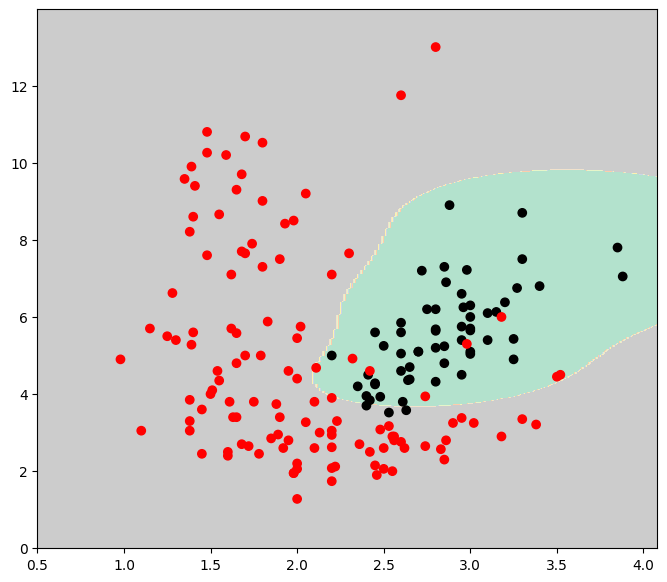

In [6]:
X = wine.loc[:,[x0,x1]].values
y_2class = wine.copy()['class'].values
y_2class[y_2class==2] = 1

scatter_colors_train = [colormap[yy] for yy in y_2class]
dlim=[0.5,4.1,0,14]

svm = SVC(kernel='rbf',gamma=.5).fit(X, y_2class)

plot_region_scatter(svm,X,'Pastel2',scatter_colors_train,dlim)

### Three classes, Two features

0.8884126984126984


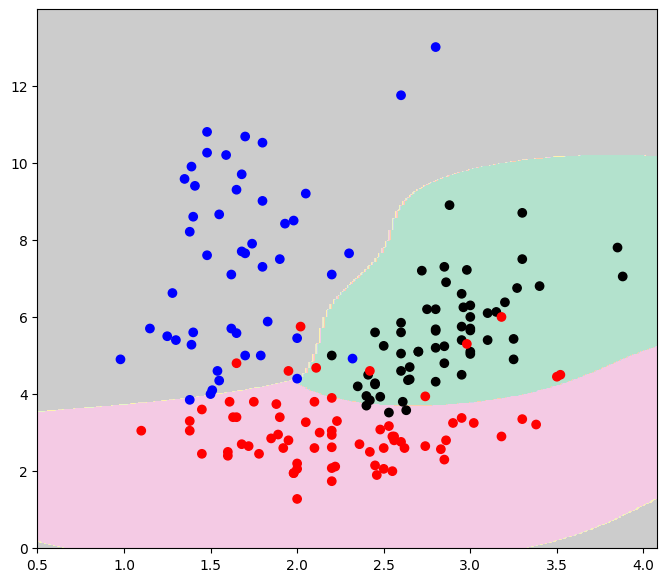

In [7]:
X = wine.loc[:,[x0,x1]].values
y_3class = wine.loc[:,'class'].values
scatter_colors_train = [colormap[yy] for yy in y_3class]
dlim=[0.5,4.1,0,14]

svm = SVC(kernel='rbf',gamma=.5).fit(X, y_3class)

cv_score = cross_val_score(svm, X, y_3class, cv=5).mean()
print(cv_score)

plot_region_scatter(svm,X,'Pastel2',scatter_colors_train,dlim)

# Support vector regression

Text(0, 0.5, 'y')

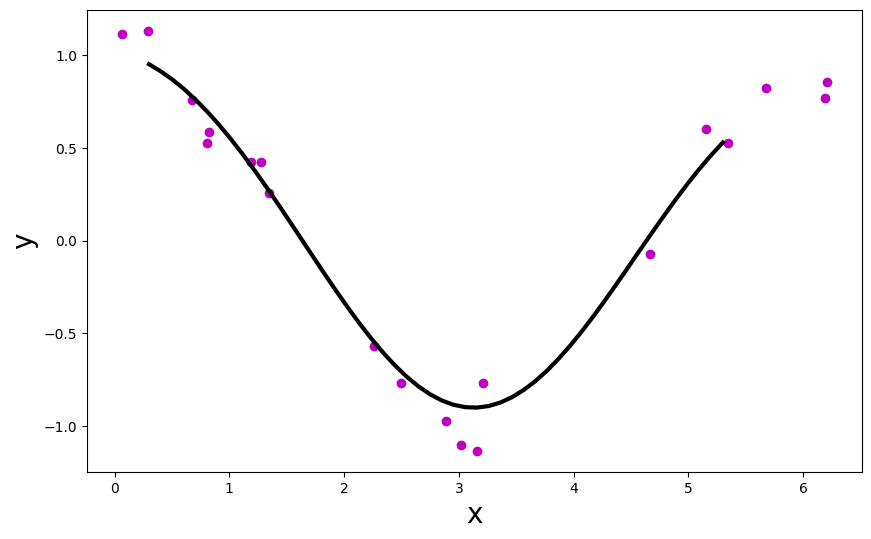

In [8]:
with open("linreg_data.pickle", "rb") as output_file:
    Z = pickle.load(output_file)
    
train = Z['train']

X = train['X'].reshape(-1, 1)
y = train['Y']

svr = SVR(kernel='rbf').fit(X, y)

xline = np.linspace(0.3,5.3).reshape(-1, 1)
yline = svr.predict(xline)

plt.figure(figsize=(10,6))
plt.plot(xline, yline, 'k',linewidth=3)
plt.scatter(X, y, color='m')
plt.xlabel('x',fontsize=20)
plt.ylabel('y',fontsize=20)